## Instrucciones

### En este notebook, encontrarás la definición de un grafo que representa la conexión entre algunas ciudades de México, tu trabajo será mapear la mejor ruta para llegar de la Ciudad A, a la ciudad B, y para ello, deberás de hacer en nuevas celdas en este script, lo siguiente:

#### * Preguntar al usuario cuál es la ciudad desde la que desea partir, y cuál es la ciudad destino
#### * Utilizar los algoritmos de búsqueda en amplitud y búsqueda en profundidad para encontrar TODAS las rutas que me permitan llegar de una ciudad a otra (Las introducidas por el usuario)
#### * Imprimir en pantalla TODOS los caminos que se hayan encontrado
#### * Imprimir en pantalla cuántas iteraciones se necesitaron para encontrar TODAS las soluciones para la búsqueda en amplitud, y cuántas se necesitaron para encontrar TODAS las soluciones para la búsqueda en profundidad
#### * Imprimir en pantalla cuál sería la ruta más corta (con menos nodos) para cada uno de los algoritmos
#### * Plotear nuevamente el grafo, pero coloreando de otro color, los nodos que formen parte de la solución mas corta (Elegir solo una si es que existen más de una
#### * Escribir en la última celda (como comentario) cuál algoritmo de búsqueda parece funcionar mejor, justificando la respuesta.


In [96]:
# Importamos las librerías para trabajar con BFS(Breadth-First Search)
# Búsqueda en amplitud

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [97]:
def dfs(grafo, inicio: str, objetivo: str, primer_y_ultimo_i: list[int], n_iteracion: list[int], visitados=None, camino=None, caminos_encontrados=None, n_profundidad: int=0, imprimir=False) -> list:
    n_profundidad += 1
    n_iteracion[0] += 1
    if imprimir:
        print("\nNivel de profundidad:", n_profundidad)
        print("Número de iteración:", n_iteracion)
        print("Primer visitado y último visitado en iteraciones: ", primer_y_ultimo_i)
    
    # Si entramos a este método por primera vez
    if visitados is None:
        visitados = set()
    if camino is None:
        camino = []
    if caminos_encontrados is None:
        caminos_encontrados = []

    camino.append(inicio)
    visitados.add(inicio)

    if imprimir:
        print("Nodo actual:", inicio)
    if imprimir:
        print("Nodos visitados", visitados)
    if imprimir:
        print("Camino Actual:", camino)

    if inicio == objetivo:
        if imprimir:
            print("Camino encontrado:", ' -> '.join(camino))
        if len(caminos_encontrados) == 0:
            primer_y_ultimo_i[0] = n_iteracion[0]
        else:
            primer_y_ultimo_i[1] = n_iteracion[0]
           
        caminos_encontrados.append(camino.copy())
    else:
        for vecino in grafo[inicio]:
            if vecino not in visitados:
                dfs(grafo, vecino, objetivo, primer_y_ultimo_i, visitados=visitados, camino=camino, caminos_encontrados=caminos_encontrados, n_profundidad=n_profundidad, n_iteracion=n_iteracion, imprimir=imprimir)

    camino.pop()  # Eliminamos el último nodo para retroceder al nodo anterior
    visitados.remove(inicio)

    tot_iteraciones = n_iteracion[0]
    return tot_iteraciones, caminos_encontrados


In [98]:
def bfs(grafo, inicio, objetivo, imprimir=False) -> tuple[int, int, list]:
    resultados = []
    # El método set crea un conjunto de datos SIMILAR a una lista pero que
    # NO puede tener elementos duplicados
    visitados = set()
    # (Doubly Ended Queue) Es un tio de lista que permite agregar y eliminar
    # elementos ya sea a la izquiera o a la derecha de la misma
    cola = deque([(inicio, [inicio])])

    i_primer_camino = None
    i_ultimo_camino = None

    i = 1
    while cola:
        # Aquí removemos el primer elemento del set (El de la izquierda)
        # y este será nuestro nodo actual, el resto, el camino (Path restante)
        nodo_actual, camino = cola.popleft()
        if imprimir:
            print("\nIteración:", i)
            print("Nodo actual:", nodo_actual)
        
        if nodo_actual == objetivo:
            if imprimir:
                print("Camino encontrado:", "->".join(camino))
            if len(resultados) == 0:
                i_primer_camino = i
            else:
                i_ultimo_camino = i
            resultados.append(camino)
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            if imprimir:
                print("Nodos visitados", visitados)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
        
                    nueva_ruta = camino + [vecino]
                    if imprimir:
                        print("Nueva ruta:", nueva_ruta)
                    cola.append((vecino, nueva_ruta))
        i += 1
    # print("No se encontró un camino al nodo objetivo.")
    return (i, i_primer_camino, i_ultimo_camino, resultados)

In [99]:
def printCaminos(caminos: list[str]) -> None:
    for i, camino in enumerate(caminos):
        print(f"{i+1}:".rjust(3), ' -> '.join(camino))

def plotGrafo(grafo, caminos_encontrados, label: str, nodo_inicio: str, nodo_objetivo: str) -> None:
    G = nx.Graph(grafo)

    # Coloreamos los nodos según si están en algún camino o no
    colores = []
    for nodo in G.nodes():
        en_camino = False
        for camino in caminos_encontrados:
            if nodo in camino:
                en_camino = True
                break
        if (nodo == nodo_inicio) or (nodo == nodo_objetivo):
            colores.append("orange")
        elif en_camino:
            colores.append('green')
        else:
            colores.append('cyan')

    # Dibujamos el grafo
    pos = nx.spring_layout(G)
    fig = plt.figure(1, figsize=(50, 25))
    nx.draw(G, pos, with_labels=True, node_color=colores, node_size=5000, font_size=30)
    plt.title(label)
    plt.show()


def busqueda(grafo, nodo_inicio: str, nodo_objetivo: str, imprimir=False):
    # Para un dado grafo con nodo de inicio y fin, se ejecutan
    # múltiples algoritmos de búsqueda
    def mostrar_caminos_encontrados(caminos, tot_iteraciones, i_primer_camino, i_ultimo_camino) -> list[str]:
        # Código común entre algoritmos de búsqueda para mostrar resultados
        caminos_cortos = None
        min_len = None

        print(f"Total de iteraciones: {tot_iteraciones}")
        print(f"Primer camino encontrado en iteración: {i_primer_camino}")
        print(f"Último camino encontrado en iteración: {i_ultimo_camino}")
        
        if caminos:
            # si el algoritmo sí encontró caminos
            print(f"Todos los caminos encontrados ({len(caminos)}):")
            printCaminos(caminos)

            # De los caminos encontrados, mostrar el/los más cortos
            min_len: int = min(len(c) for c in caminos)
            caminos_cortos = [c for c in caminos if len(c) == min_len]
            print(f"Caminos MÁS CORTOS encontrados ({len(caminos_cortos)}), len={min_len}:")
            printCaminos(caminos_cortos)
        else:
            print("No se encontró un camino al nodo objetivo.")
        print()

        # se regresan los caminos para comparar con otros algoritmos e imprimir el más corto
        return (min_len, caminos_cortos)
        
    print(f"NODO DE INICIO: {nodo_inicio}\nNODO OBJETIVO: {nodo_objetivo}\n")
    
    ############################################################
    # DFS
    ############################################################
    print("Recorrido DFS:")
    primer_y_ultimo_i = [None, None]
    tot_iteraciones, caminos_encontrados = dfs(grafo, nodo_inicio, nodo_objetivo, primer_y_ultimo_i, n_iteracion=[0], imprimir=imprimir)
    i_primer_camino, i_ultimo_camino = primer_y_ultimo_i 
    min_len_dfs, caminos_min_dfs = mostrar_caminos_encontrados(caminos_encontrados, tot_iteraciones, i_primer_camino, i_ultimo_camino)
        
    ############################################################
    # BFS
    ############################################################
    print("Recorrido BFS:")
    tot_iteraciones, i_primer_camino, i_ultimo_camino, caminos_encontrados = bfs(grafo, nodo_inicio, nodo_objetivo, imprimir=imprimir)
    min_len_bfs, caminos_min_bfs = mostrar_caminos_encontrados(caminos_encontrados, tot_iteraciones, i_primer_camino, i_ultimo_camino)
    
    ############################################################
    # Creación de gráfico
    ############################################################
    min_len = None
    match (min_len_dfs, min_len_bfs):
        case (None, None):
            print("\nNo se encontraon caminos")
            label_grafo = None
            camino_final_plot = []
        case (dfs_res, None):
            min_len = dfs_res
            camino_final_plot = [caminos_min_dfs[0]]
            label_grafo = "Profunidad"
        case (None, bfs_res):
            min_len = bfs_res
            label_grafo = "Amplitud"
            camino_final_plot = [caminos_min_bfs[0]]
        case (dfs_res, bfs_res):
            if dfs_res < bfs_res:
                min_len = dfs_res
                camino_final_plot = [caminos_min_dfs[0]]
                label_grafo = "Profunidad"
            else:
                min_len = bfs_res
                camino_final_plot = [caminos_min_bfs[0]]
                label_grafo = "Amplitud"

    print("Camino más corto final")
    printCaminos(camino_final_plot)
    plotGrafo(grafo, camino_final_plot, f"Búsqueda por {label_grafo} len={min_len}\n{nodo_inicio} -> {nodo_objetivo}", nodo_inicio, nodo_objetivo)


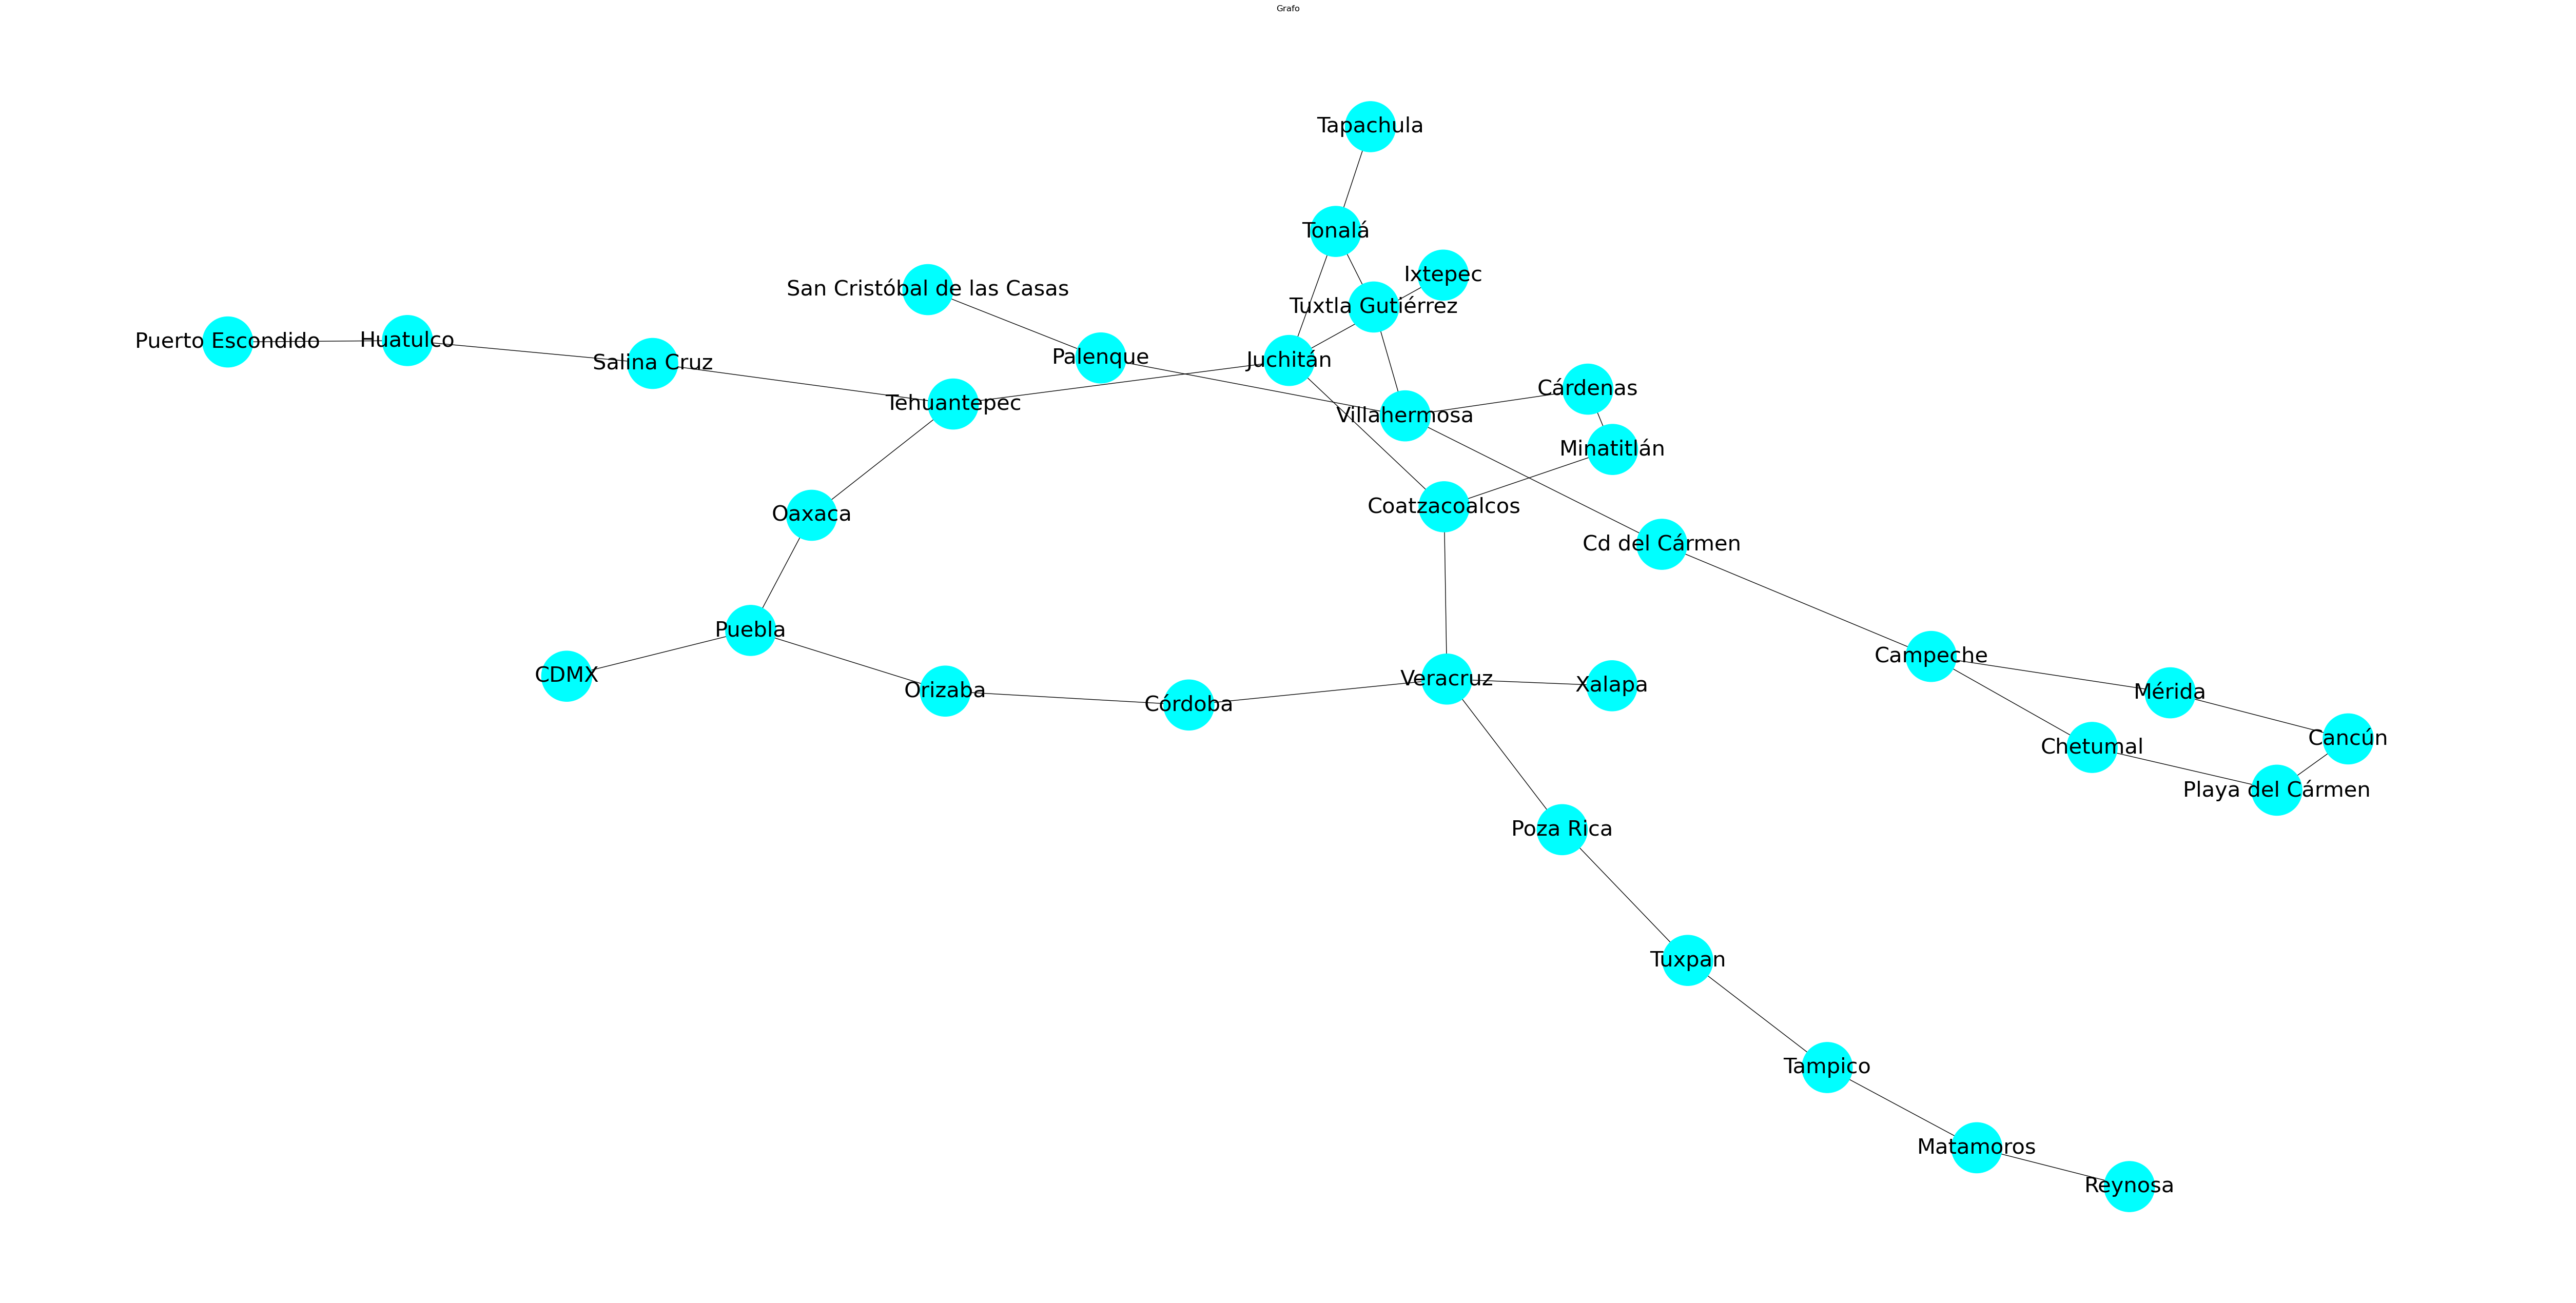

In [100]:
# Tenemos las siguientes ciudades interconectadas:
# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'Campeche': ['Chetumal', 'Cd del Cármen', 'Mérida'],
    'Cárdenas': ['Minatitlán', 'Villahermosa'],
    'Cd del Cármen': ['Campeche', 'Villahermosa'],
    'CDMX': ['Puebla'],
    'Chetumal': ['Campeche', 'Playa del Cármen'],
    'Coatzacoalcos': ['Juchitán', 'Minatitlán', 'Veracruz'],
    'Córdoba': ['Orizaba', 'Veracruz'],
    'Cancún': ['Mérida', 'Playa del Cármen'],
    'Huatulco': ['Puerto Escondido', 'Salina Cruz'],
    'Ixtepec': ['Juchitán'],
    'Juchitán': ['Coatzacoalcos', 'Ixtepec', 'Tehuantepec', 'Tonalá'],
    'Minatitlán': ['Cárdenas', 'Coatzacoalcos'],
    'Matamoros': ['Reynosa', 'Tampico'],
    'Mérida': ['Campeche', 'Cancún'],
    'Oaxaca': ['Puebla', 'Tehuantepec'],
    'Orizaba': ['Córdoba', 'Puebla'],
    'Palenque': ['San Cristóbal de las Casas', 'Villahermosa'],
    'Playa del Cármen': ['Cancún', 'Chetumal'],
    'Poza Rica': ['Tuxpan', 'Veracruz'],
    'Puebla': ['CDMX', 'Oaxaca', 'Orizaba'],
    'Puerto Escondido': ['Huatulco'],
    'Reynosa': ['Matamoros'],
    'Salina Cruz': ['Huatulco', 'Tehuantepec'],
    'San Cristóbal de las Casas': ['Palenque'],
    'Tampico': ['Matamoros', 'Tuxpan'],
    'Tapachula': ['Tonalá'],
    'Tehuantepec': ['Juchitán', 'Oaxaca', 'Salina Cruz'],
    'Tonalá': ['Tapachula', 'Tuxtla Gutiérrez', 'Juchitán'],
    'Tuxpan': ['Poza Rica', 'Tampico'],
    'Tuxtla Gutiérrez': ['Tonalá', 'Villahermosa'],
    'Veracruz': ['Coatzacoalcos', 'Córdoba', 'Xalapa', 'Poza Rica'],
    'Villahermosa': ['Cárdenas', 'Cd del Cármen', 'Palenque', 'Tuxtla Gutiérrez'],
    'Xalapa': ['Veracruz']
}

plotGrafo(grafo, [], "Grafo", "", "")


NODO DE INICIO: Campeche
NODO OBJETIVO: CDMX

Recorrido DFS:
Total de iteraciones: 101
Primer camino encontrado en iteración: 16
Último camino encontrado en iteración: 82
Todos los caminos encontrados (4):
 1: Campeche -> Cd del Cármen -> Villahermosa -> Cárdenas -> Minatitlán -> Coatzacoalcos -> Juchitán -> Tehuantepec -> Oaxaca -> Puebla -> CDMX
 2: Campeche -> Cd del Cármen -> Villahermosa -> Cárdenas -> Minatitlán -> Coatzacoalcos -> Veracruz -> Córdoba -> Orizaba -> Puebla -> CDMX
 3: Campeche -> Cd del Cármen -> Villahermosa -> Tuxtla Gutiérrez -> Tonalá -> Juchitán -> Coatzacoalcos -> Veracruz -> Córdoba -> Orizaba -> Puebla -> CDMX
 4: Campeche -> Cd del Cármen -> Villahermosa -> Tuxtla Gutiérrez -> Tonalá -> Juchitán -> Tehuantepec -> Oaxaca -> Puebla -> CDMX
Caminos MÁS CORTOS encontrados (1), len=10:
 1: Campeche -> Cd del Cármen -> Villahermosa -> Tuxtla Gutiérrez -> Tonalá -> Juchitán -> Tehuantepec -> Oaxaca -> Puebla -> CDMX

Recorrido BFS:
Total de iteraciones: 37
Prime

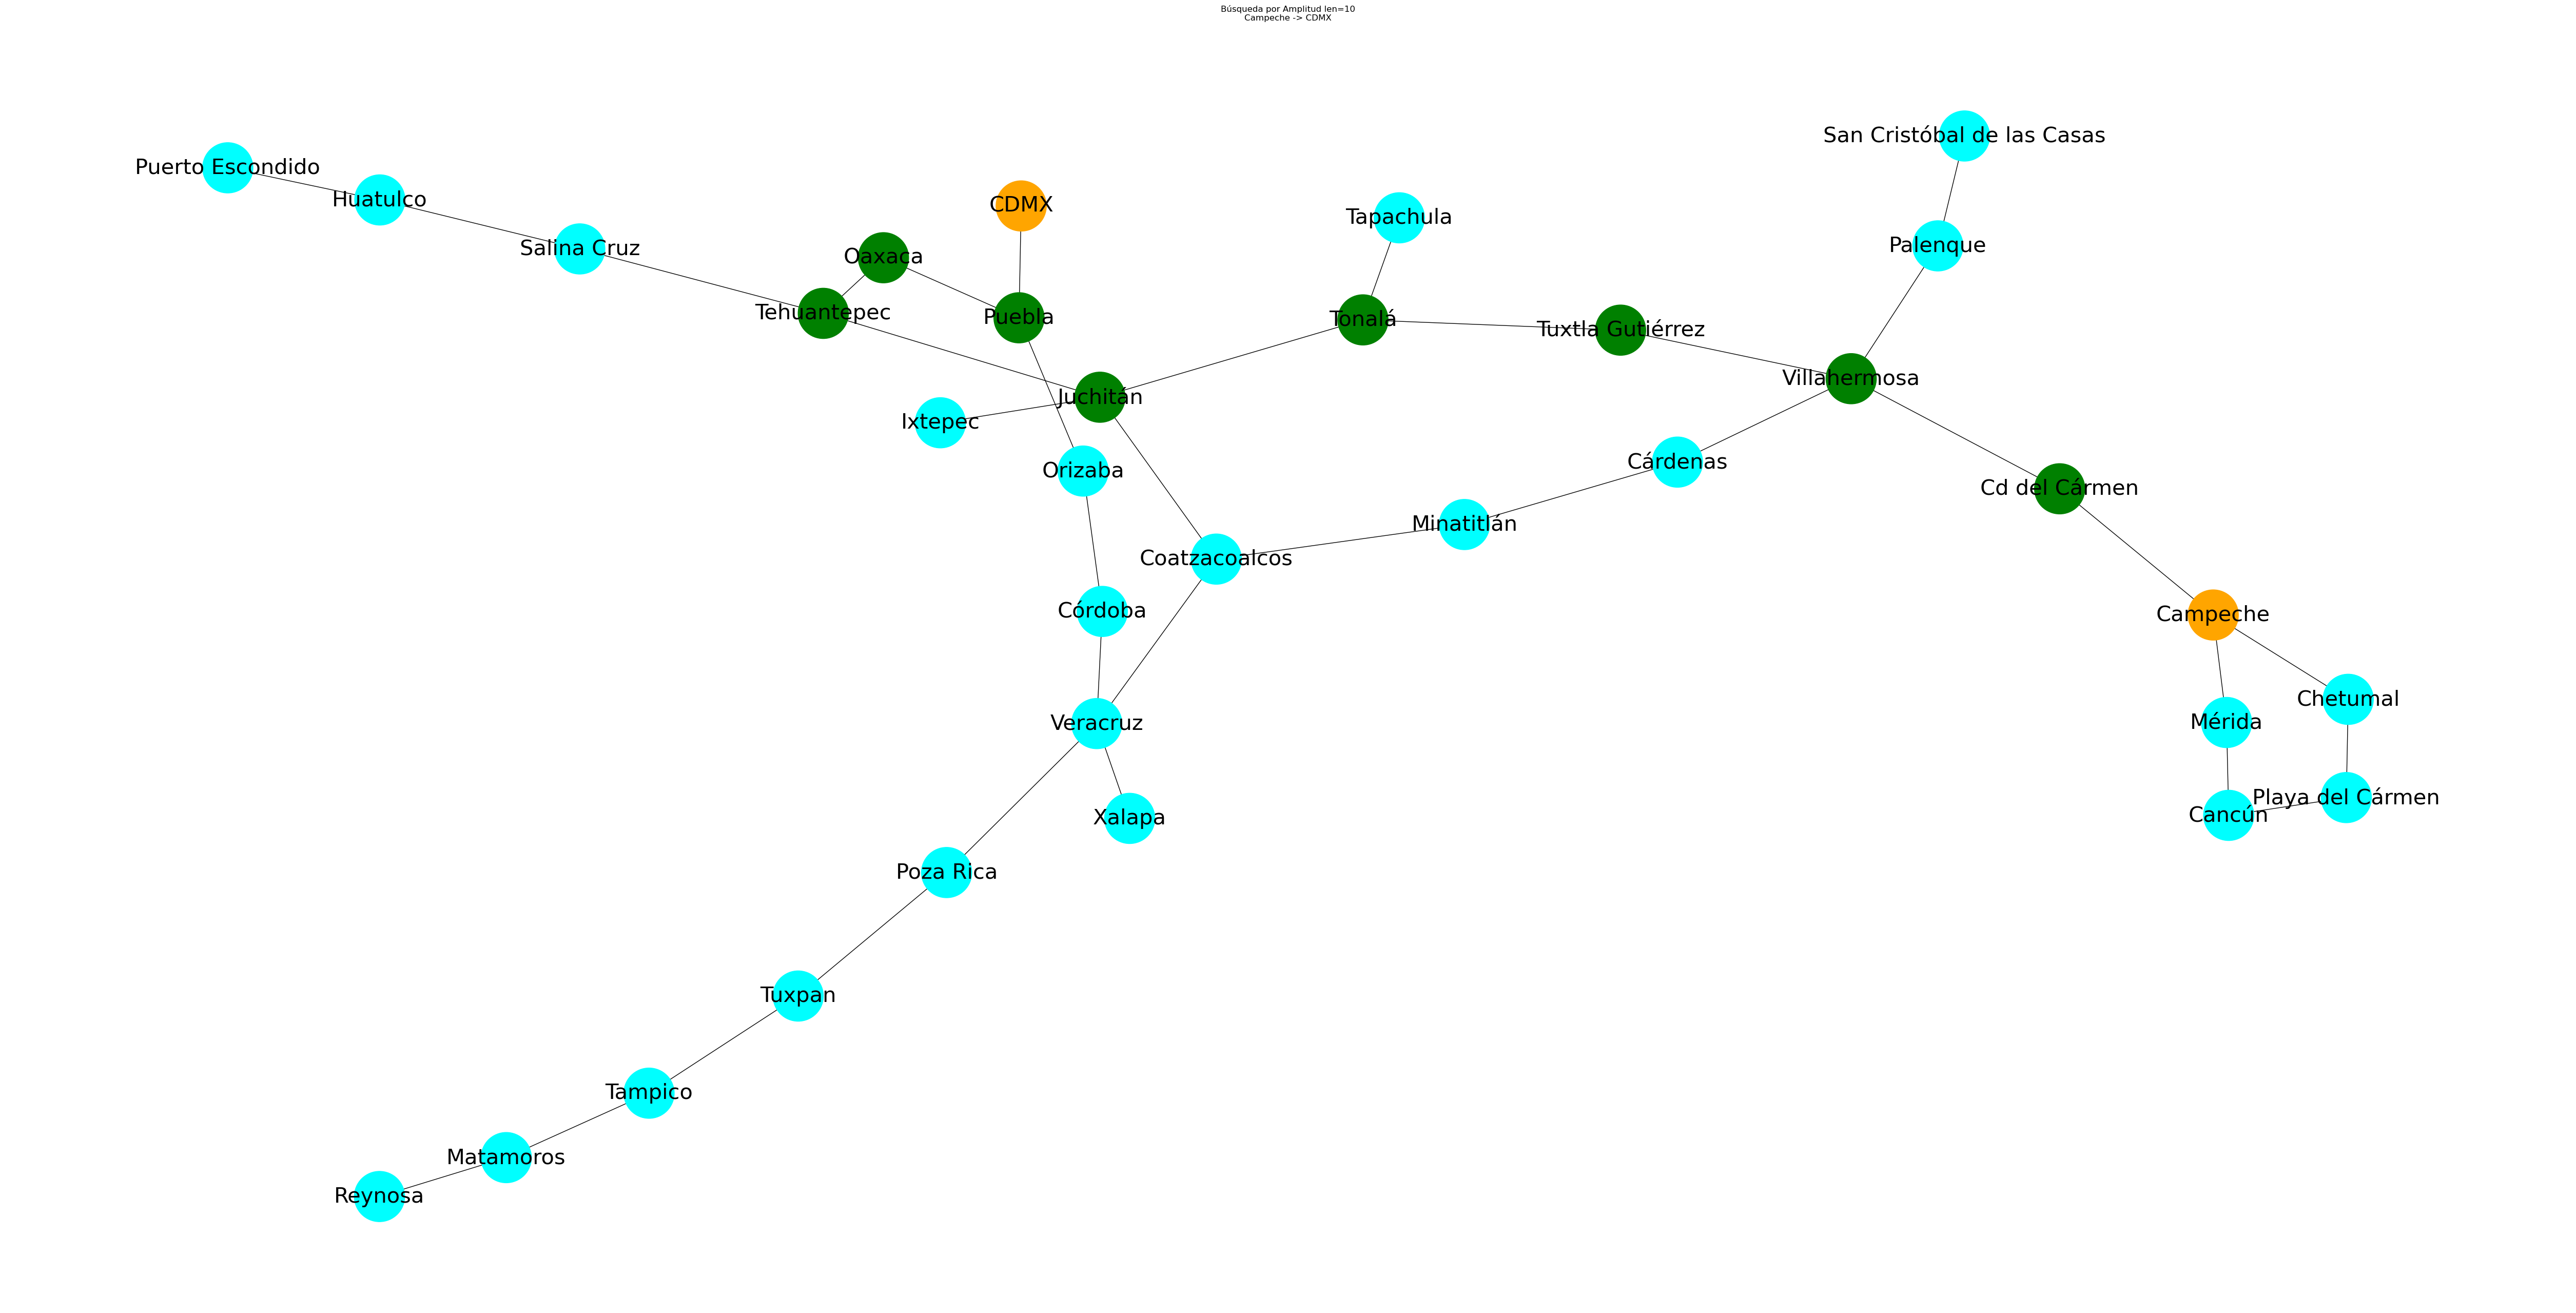

In [101]:
# INICIO
def main():
    # # Nodo de inicio y nodo objetivo
    # nodo_inicio = 'Reynosa'
    # nodo_objetivo = 'Playa del Cármen'
    nodo_inicio = input("Ingrese la ciudad de inicio: ")
    nodo_objetivo = input("Ingrese la ciudad final: ")

    busqueda(grafo, nodo_inicio, nodo_objetivo, imprimir=False)

main()

Cada lagoritmo tiene sus ventajas y desventajas. En algunos casos el DFS encuentra una solución en considerables menos iteraciones que el BFS, pero posiblemente es de menor calidad. Dependería de las necesidades de cada programa en que la búsqueda se utilice, pero creo yo que en general más vale errar en BFS para evitar muchos caminos profundos que podrían hacer perder tiempo en DFS.